In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import configparser

#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
config_file =  os.path.join(root, "config.cfg")

# get Spotify api credentials
config = configparser.ConfigParser()
config.read(config_file)
CLIENT_ID = config["spotify"]["id"]
CLIENT_SECRET = config["spotify"]["secret"]

# Load data



### List of bike songs

#### Long list

Source: https://drive.google.com/file/d/15euF9Sz1qbj0Cnhty6tJSrDUwadhBD82/view?usp=share_link


Pdf converted to csv file using pdf_tables.com

In [49]:
raw = pd.read_csv("BikeSongs_06 2023.csv")

In [51]:
df_long = raw.copy()

# drop all empty rows
df_long = df_long.dropna(how='all').reset_index(drop=True)

# rename columns
new_column_names = {
    'Artist': 'Artist',
    'Title [language, genre, if not pop or rock]': 'Title_raw',
    'Source/Collection [Rereleased/Year]': 'Collection',
    'Origin Yr.': 'Year_raw',
    'Label [self or unknown]': 'Label'
}
df_long.rename(columns=new_column_names, inplace=True)

# clean title
df_long['Title'] = df_long['Title_raw'].str.split('[', expand=True)[0]
df_long['Title_info'] = df_long['Title_raw'].str.split('[', expand=True)[1]
df_long["Title"] = df_long["Title"].str.replace("\n", "")

# clean up year
replacement_mapping = {
    'c. ': '',
    'c.': '',
    'b. ':'',
    '\[unk.\]': None,
    "’s": '',
    '1927-2013': '2013',
    '1970, 2005': '2005'
}
df_long['Year'] = pd.to_numeric(df_long['Year_raw'].replace(replacement_mapping, regex=True), errors='coerce')

df_long

,Artist,Title_raw,Collection,Label,Year_raw,Title,Title_info,Year
0,- 17 different artists -,[23 songs about Tour de France],100th Tour de France [complilation],Puzzle Productions,2013,,23 songs about Tour de France],2013.0
1,- 17 different artists -,"[Texas bicycling culture, indie]",The Peek-a-Boo Bicycle Rodeo [comp.],Peek-a-Boo Records,1995,,"Texas bicycling culture, indie]",1995.0
2,- 19 different artists -,"[22 songs, no specific titles, glitch beats]",Bike Grooves [comp.],Olavbelgoe,2010,,"22 songs, no specific titles, glitch beats]",2010.0
3,- 24 different artists -,"[24 songs, Radio France]",Le Velo En Chansons [comp.],Harmonia Mundi,1995,,"24 songs, Radio France]",1995.0
4,- 26 different artists -,"[26 songs, Tour de France official collection]",Le Tour de France en Chansons [comp.],Lm Music,2012,,"26 songs, Tour de France official collection]",2012.0
...,...,...,...,...,...,...,...,...
2321,Zoey van Goey’s,We Don't Have That Kind of Bread,The Cage Was Unlocked All Along,Chemikal Underground,2009,We Don't Have That Kind of Bread,None,2009.0
2322,"Zonana, Saul",Fool on a bicycle,Guinea Pigs,BCI,2006,Fool on a bicycle,None,2006.0
2323,"Zucker, Laurel",Bicycling Uphill for Flute & Double Bass,Journeys,Cantilena Rec.,2011,Bicycling Uphill for Flute & Double Bass,None,2011.0
2324,"Zuckowski, Rolf","An meinem Fahrrad ist alles dran [juv.,\n“Ever...",Der Spielmann-Das Beste,MFD,1997,An meinem Fahrrad ist alles dran,"juv.,\n“Everything is to my bicycle”]",1997.0


### Short list

Wikipedia article: "https://en.wikipedia.org/wiki/List_of_songs_about_bicycles"

In [98]:
url = 'https://en.wikipedia.org/wiki/List_of_songs_about_bicycles'
df_raw = pd.read_html(url)[0]
df_raw["Title"] = df_raw["Title"].str.replace('"', '')
df_raw.to_csv("bikesongs_shortlist_raw.csv", index=False)

In [126]:
df = pd.read_csv("bikesongs_shortlist_with_id.csv")
df

,Title,Author,Year,Comments,spotify_track_id
0,The Acoustic Motorbike,Luka Bloom,1992,NaN,24hKXgJKxKTYmooGzFytX5
1,Amsterdam,Riblja Čorba,1986,From the album Osmi nervni slom,3yzPDhocvLw6A3HQo9eehb
2,An Elegy for Baby Blue,The Wonder Years (band),2008,"From ""Won't Be Pathetic Forever"" EP",6RMpR8v0WmlIhChhua2hso
3,Apology Song,The Decemberists,2001,From the 5 Songs EP,0jFKuwXlirLLPDDGeenm8G
4,A Bicicleta,Toquinho,1983,Album Casa de brinquedos.[4],3XwECXbBDGwERtTjHZFLu5
...,...,...,...,...,...
86,Two Wheels,Wax,2011,Scrublife,NaN
87,Yellow Bike,Pedro the Lion,2019,From the album Phoenix,1vztTdgyyARufM8lnCFEzE
88,Bicycle[34][35],RM,2021,Unofficial Release[36],NaN
89,Bicycle Wheels,Ugly Kid Joe,1996,NaN,29LebKCIqMPjNnCjeBknAc


### Get data from Spotify API

#### Authenticate

In [4]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

#### Get data for known ids

general info
- track duration
- Track popularity
- artist popularity
- external url

audio features
- acousticness
- danceability
- energy
- instrumentalness
- liveness
- loudness
- mode
- speechiness
- tempo
- time_signature
- valence

In [240]:
# get tracks

# dict to hold data
tracks_dict = {"track_id":[], "url": [], "track_popularity":[], "artist_id": []}

# list of tracks ids - need to split in 50
track_ids = df["spotify_track_id"].dropna().unique().tolist()
track_ids_split = [track_ids[0:50], track_ids[50:]]

# request data
for ids in track_ids_split:
    tracks_json = sp.tracks(ids)
    for i, tracks in enumerate(tracks_json["tracks"]):
        tracks_dict["track_id"].append(tracks_json["tracks"][i]["id"])
        tracks_dict["url"].append(tracks_json["tracks"][i]["external_urls"]["spotify"])
        tracks_dict["track_popularity"].append(tracks_json["tracks"][i]["popularity"])
        tracks_dict["artist_id"].append(tracks_json["tracks"][i]["artists"][0]["id"])

# turn into dataframe
sp_tracks_df = pd.DataFrame(tracks_dict)
sp_tracks_df.head()

,track_id,url,track_popularity,artist_id
0,24hKXgJKxKTYmooGzFytX5,https://open.spotify.com/track/24hKXgJKxKTYmoo...,15,39E69agNUFWOZEzO24bjpo
1,3yzPDhocvLw6A3HQo9eehb,https://open.spotify.com/track/3yzPDhocvLw6A3H...,30,7ET6Htzqtmr3w1tOoHLJAm
2,6RMpR8v0WmlIhChhua2hso,https://open.spotify.com/track/6RMpR8v0WmlIhCh...,18,0nq64XZMWV1s7XHXIkdH7K
3,0jFKuwXlirLLPDDGeenm8G,https://open.spotify.com/track/0jFKuwXlirLLPDD...,21,7ITd48RbLVpUfheE7B86o2
4,3XwECXbBDGwERtTjHZFLu5,https://open.spotify.com/track/3XwECXbBDGwERtT...,23,7rPqFVgJYARiFsLDlN6W6y


In [241]:
# get artist data

# dict to hold data
artists_dict = {"artist_id":[], "popularity":[], "followers":[], "genre":[], "image_url":[], "artist_url": []}

# list of ids - need to split in 50
artist_ids = sp_tracks_df["artist_id"].tolist()
artist_ids_split = [artist_ids[:50], artist_ids[50:]]

# request data
for ids in artist_ids_split:
        artists_json = sp.artists(ids)
        for i, artists in enumerate(artists_json["artists"]):
                artists_dict["artist_id"].append(artists_json["artists"][i]["id"])
                artists_dict["popularity"].append(artists_json["artists"][i]["popularity"])
                artists_dict["followers"].append(artists_json["artists"][i]["followers"]["total"])
                artists_dict["genre"].append(artists_json["artists"][i]["genres"])
                if len(artists_json["artists"][i]["images"])>0:
                        artists_dict["image_url"].append(artists_json["artists"][i]["images"][0]["url"])
                else:
                        artists_dict["image_url"].append(None)
                artists_dict["artist_url"].append(artists_json["artists"][i]["external_urls"]["spotify"])

# turn into dataframe
sp_artists_df = pd.DataFrame(artists_dict)
sp_artists_df.head()

,artist_id,popularity,followers,genre,image_url,artist_url
0,39E69agNUFWOZEzO24bjpo,30,19975,[irish singer-songwriter],https://i.scdn.co/image/ab6761610000e5eb0c2167...,https://open.spotify.com/artist/39E69agNUFWOZE...
1,7ET6Htzqtmr3w1tOoHLJAm,34,91223,[yugoslav rock],https://i.scdn.co/image/ab6772690000c46c0c2024...,https://open.spotify.com/artist/7ET6Htzqtmr3w1...
2,0nq64XZMWV1s7XHXIkdH7K,49,272439,"[alternative emo, anthem emo, emo, philly indi...",https://i.scdn.co/image/ab6761610000e5eb73c0ac...,https://open.spotify.com/artist/0nq64XZMWV1s7X...
3,7ITd48RbLVpUfheE7B86o2,53,605877,"[baroque pop, canadian indie, chamber pop, ind...",https://i.scdn.co/image/ab6761610000e5eb98bedc...,https://open.spotify.com/artist/7ITd48RbLVpUfh...
4,7rPqFVgJYARiFsLDlN6W6y,59,474335,"[bossa nova, mpb, samba, violao]",https://i.scdn.co/image/ab6761610000e5ebafcaf4...,https://open.spotify.com/artist/7rPqFVgJYARiFs...


In [ ]:
# get tracks audio features



# Explore data

In [129]:
pivot = df_long[df_long["Year"]>=1950]
pivot = pivot.groupby("Year")["Title"].count().reset_index()

import numpy as np
helper = pd.DataFrame()
helper["Year"] = np.arange(1950,2023,1)
pivot = pd.merge(helper, pivot, how="outer", on="Year").fillna(0)
pivot

,Year,Title
0,1950.0,6.0
1,1951.0,2.0
2,1952.0,2.0
3,1953.0,0.0
4,1954.0,0.0
...,...,...
69,2019.0,32.0
70,2020.0,24.0
71,2021.0,19.0
72,2022.0,17.0


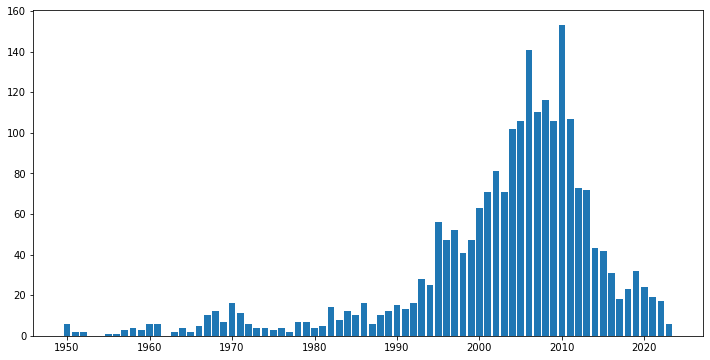

In [130]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(pivot["Year"], pivot["Title"])
plt.show()

# Playground

### Find track by name

In [56]:
i = 20
print(df_long["Title"][i].lower().replace(" ", "%"), " by:", df_long["Artist"][i])

girl%on%a%bike  by: Aardvarks


In [64]:
i = 135
print(df_long["Title"][i].lower(), " by:", df_long["Artist"][i])


query = "track:%An%meinem%Fahrrad%ist%alles%dran"
query = "track:%"+"Fool on a bicycle".replace(" ", "%")
query = df["Title"][i].lower().replace(" ", "%")
#query = "artist:Zuckowski"
print(query)

track = sp.search(query, limit=10, type='track', market=None)
#track["tracks"].items()
#track["tracks"]["items"][0]["artists"]
#track["tracks"]["items"][0]["name"]
for i, tracks in enumerate(track["tracks"].items()):
    print(track["tracks"]["items"][i]["artists"][0]["name"])

bicycle go! go!   by: Baku
bicycle%go!%go!%
Bombay Bicycle Club
I Am Drug
Queen
Bombay Bicycle Club
Queen
Bombay Bicycle Club
Tanger


In [ ]:
i = 1
print(df["Title"][i].lower(), " by:", df["Author"][i])
query = df["Title"][i].lower().replace(" ", "%")
print("----")

track = sp.search(query, limit=15, type='track', market=None)
#track["tracks"].items()
for i, tracks in enumerate(track["tracks"].items()):
    print(track["tracks"]["items"][i]["artists"][0]["name"])

track["tracks"]["items"][0]
print(track["tracks"]["items"][1]["id"])
print(track["tracks"]["items"][1]["external_urls"]["spotify"])
print(track["tracks"]["items"][1]["artists"][0]["name"])

#### Test

In [131]:
# get audio features
features = sp.audio_features(tracks=["24hKXgJKxKTYmooGzFytX5"])
features

[{'danceability': 0.563,
  'energy': 0.93,
  'key': 10,
  'loudness': -10.513,
  'mode': 0,
  'speechiness': 0.0371,
  'acousticness': 0.0324,
  'instrumentalness': 0.0293,
  'liveness': 0.316,
  'valence': 0.863,
  'tempo': 118.102,
  'type': 'audio_features',
  'id': '24hKXgJKxKTYmooGzFytX5',
  'uri': 'spotify:track:24hKXgJKxKTYmooGzFytX5',
  'track_href': 'https://api.spotify.com/v1/tracks/24hKXgJKxKTYmooGzFytX5',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/24hKXgJKxKTYmooGzFytX5',
  'duration_ms': 255400,
  'time_signature': 4}]

In [84]:
query = "track:%An%meinem%Fahrrad%ist%alles%dran"
#query = "artist:Zuckowski"

## Get data

In [ ]:
# Initialize a list to hold the data
data = []

# Loop through all the pages to extract text
for page_num in range(len(pdf_reader.pages)):
    page = pdf_reader.pages[page_num]
    text = page.extract_text()
    
    # Split the text into lines
    lines = text.split('-')
    
    # Extract relevant data from lines and append to data list
    for line in lines:
        # Clean up the line
        line = line.strip()
        # Split the line into columns based on predefined structure
        if line:
            parts = line.split(' - ')
            if len(parts) >= 5:
                artist = parts[0].strip()
                title = parts[1].strip()
                source = parts[2].strip()
                label = parts[3].strip()
                origin_year = parts[4].strip()
                data.append([artist, title, source, label, origin_year])

# Close the PDF file
#pdf.close()

In [ ]:
page = pdf_reader.pages[0]
text = page.extract_text()

# Split the text into lines
lines = re.split(r"(\d{4})", text)
def combine_items_in_pairs(item_list):
    combined_pairs = []
    for i in range(0, len(item_list), 2):
        if i + 1 < len(item_list):
            combined_pairs.append(f"{item_list[i]} ++ {item_list[i + 1]}")
        else:
            combined_pairs.append(item_list[i])  # Handle odd number of items
    return combined_pairs

lines = combine_items_in_pairs(lines)
lines